In [1]:
#Script used to automate the calibration of the NDR Model Adapted from Campanhao et al. 2023
import logging
import sys

import natcap.invest.sdr.sdr
import natcap.invest.utils

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
import os

file_path = r"C:\Users\kbilbr3\Documents\ArcGIS\Projects\MyProject2\Puerto Rico Watershed\Kolin's Script\Kolin's Script\Class project Dataset\interpret_dams_wqp.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist!")

File does not exist!


In [4]:
directory = r"C:/Users/kbilbr3/Documents"

# List all files in the directory
files = os.listdir(directory)
print(files)


['.ipynb_checkpoints', '.Rhistory', 'ArcGIS', 'Bilbrew_WK14ProgressReport.ipynb', 'Custom Office Templates', 'desktop.ini', 'My Music', 'My Pictures', 'My Videos', 'Puerto Rico Watershed Coding', 'Puerto Rico Watershed Scientific Programming Final Project', '~$lbrew_WK15expected_grade_assignment (1).docx']


In [5]:
df1= 'C:/Users/kbilbr3/Documents/Puerto Rico Watershed Coding/intercept_dams_wqp2.csv'
intercept_file= pd.read_csv(df1)
print(intercept_file)

          USGS_MS  OID_   Drainage
0   USGS-50071000     1    Fajardo
1   USGS-50075000     2  RioBlanco
2   USGS-50074950     3  RioBlanco
3   USGS-50061800     4  Canovanas
4   USGS-50056400     5      Loiza
5   USGS-50051310     6      Loiza
6   USGS-50057000     7      Loiza
7   USGS-50055000     8      Loiza
8   USGS-50092000     9   Patillas
9   USGS-50043000    10    LaPlata
10  USGS-50046000    11    LaPlata
11  USGS-50106500    12      Coamo
12  USGS-50114000    13  Cerrillos
13  USGS-50027000    14   DosBocas
14  USGS-50115000    15  Portuguez
15  USGS-50027250    16   DosBocas
16  USGS-50023000    17   DosBocas
17  USGS-50021050    18   DosBocas
18  USGS-50021000    19   DosBocas
19  USGS-50021500    20   DosBocas
20  USGS-50020500    21   DosBocas
21  USGS-50010500    22  Guajataca
22  USGS-50129000    23       Loco
23  USGS-50129500    24       Loco
24  USGS-50011400    25  Guajataca


In [6]:
df2= 'C:/Users/kbilbr3/Documents/Puerto Rico Watershed Coding/dam_deposition_data.csv'
dam_deposition_file= pd.read_csv(df2)
print(dam_deposition_file)

     Drainage  Obsdam_deposition_tonsyr
0      Blanco                      1800
1     Fajardo                      1800
2      Guineo                      9000
3   Matrullas                     14400
4      Prieto                     16200
5   Portuguez                     18000
6      Garzas                     19800
7       Cidra                     23400
8    Yahuecas                     41400
9        Loco                     41400
10  Cerrillos                     54000
11     Carite                     55800
12   Patillas                     72000
13      Guayo                     77400
14   Guayabal                    104400
15  Guajataca                    124200
16    ToaVaca                    234000
17   Luchetti                    280800
18    LaPlata                    437400
19  Caonillas                    419400
20      Loiza                    244800
21   DosBocas                    554400


In [7]:
df3='C:/Users/kbilbr3/Documents/Puerto Rico Watershed Coding/invest_dams_data.csv'
invest_dams_file= pd.read_csv(df3)
print(invest_dams_file)


                   Drainage  AreaSqKM  investsed_exportstonyear
0                      Vivi     16.79                  13380.74
1                  Adjuntas     53.98                  86655.01
2                 Caonillas    125.15                 151338.24
3                    Carite     21.47                     96.30
4                 Cerrillos     45.09                  12441.28
5                     Cidra     21.04                   2509.32
6                     Coamo    169.67                  45497.53
7                    Daguey      2.92                     43.65
8                    Garzas     15.86                  20281.82
9                 Guajataca     60.46                  24632.35
10                 Guayabal    112.03                  84268.59
11                    Guayo     25.00                  80358.43
12                   Guineo      4.24                      0.00
13                   Icacos      7.39                      0.00
14                  LaPlata    467.45   

In [8]:
df4= 'C:/Users/kbilbr3/Documents/Puerto Rico Watershed Coding/wqp_data2.csv'
wqp_file= pd.read_csv(df4)
print(wqp_file)

          USGS_MS  tot_diss_sdl_2000  tot_sus_sld_2000
0   USGS-50010500        1277.267946       1533.069205
1   USGS-50011000        9986.101540               NaN
2   USGS-50011400        6433.867111        409.991323
3   USGS-50013000        1834.164134               NaN
4   USGS-50014000        1084.647186               NaN
..            ...                ...               ...
74  USGS-50136400        7729.330454        950.270228
75  USGS-50138000       37633.309240       9763.471050
76  USGS-50144000       52987.825970      19224.739230
77  USGS-50145000       40276.146120               NaN
78  USGS-50147800       54936.677290               NaN

[79 rows x 3 columns]


In [9]:
wqp_intercept_dams_left_join= pd.merge(intercept_file, wqp_file, on='USGS_MS',  how='left')
print(wqp_intercept_dams_left_join)

          USGS_MS  OID_   Drainage  tot_diss_sdl_2000  tot_sus_sld_2000
0   USGS-50071000     1    Fajardo        5174.149644       3433.621680
1   USGS-50075000     2  RioBlanco         555.521177               NaN
2   USGS-50074950     3  RioBlanco          21.863201               NaN
3   USGS-50061800     4  Canovanas        3235.125918               NaN
4   USGS-50056400     5      Loiza        7313.988440               NaN
5   USGS-50051310     6      Loiza        4452.733468               NaN
6   USGS-50057000     7      Loiza       18378.077960               NaN
7   USGS-50055000     8      Loiza       30681.369160      30343.503650
8   USGS-50092000     9   Patillas        6235.443878        983.946059
9   USGS-50043000    10    LaPlata       33508.933370       4318.601408
10  USGS-50046000    11    LaPlata       73039.827900       4882.558297
11  USGS-50106500    12      Coamo       12604.507790        986.472245
12  USGS-50114000    13  Cerrillos        6336.050072       2776

In [10]:
import pandas as pd

df = pd.DataFrame(wqp_intercept_dams_left_join)


# Group by columns 'A' and 'B', then apply both sum and mean to 'nut_load_meantonyear'
wqp_dams_consolidated = df[['USGS_MS', 'Drainage', 'tot_diss_sdl_2000', 'tot_sus_sld_2000' ]].groupby('Drainage').agg(
   tot_diss_load_sum=('tot_diss_sdl_2000', 'sum'),  # Sum of 'nut_load_meantonyear'
    tot_diss_load_mean=('tot_diss_sdl_2000', 'mean'),
     tot_sus_load_sum=('tot_sus_sld_2000', 'sum'),
    tot_sus_load_mean=('tot_sus_sld_2000', 'mean')
).reset_index()

print(wqp_dams_consolidated)


     Drainage  tot_diss_load_sum  tot_diss_load_mean  tot_sus_load_sum  \
0   Canovanas        3235.125918         3235.125918          0.000000   
1   Cerrillos        6336.050072         6336.050072       2776.624700   
2       Coamo       12604.507790        12604.507790        986.472245   
3    DosBocas       89018.092834        12716.870405       2023.669041   
4     Fajardo        5174.149644         5174.149644       3433.621680   
5   Guajataca        7711.135057         3855.567528       1943.060528   
6     LaPlata      106548.761270        53274.380635       9201.159705   
7        Loco       40146.203663        20073.101832          0.000000   
8       Loiza       60826.169028        15206.542257      30343.503650   
9    Patillas        6235.443878         6235.443878        983.946059   
10  Portuguez       11844.328640        11844.328640       2212.319178   
11  RioBlanco         577.384379          288.692189          0.000000   

    tot_sus_load_mean  
0            

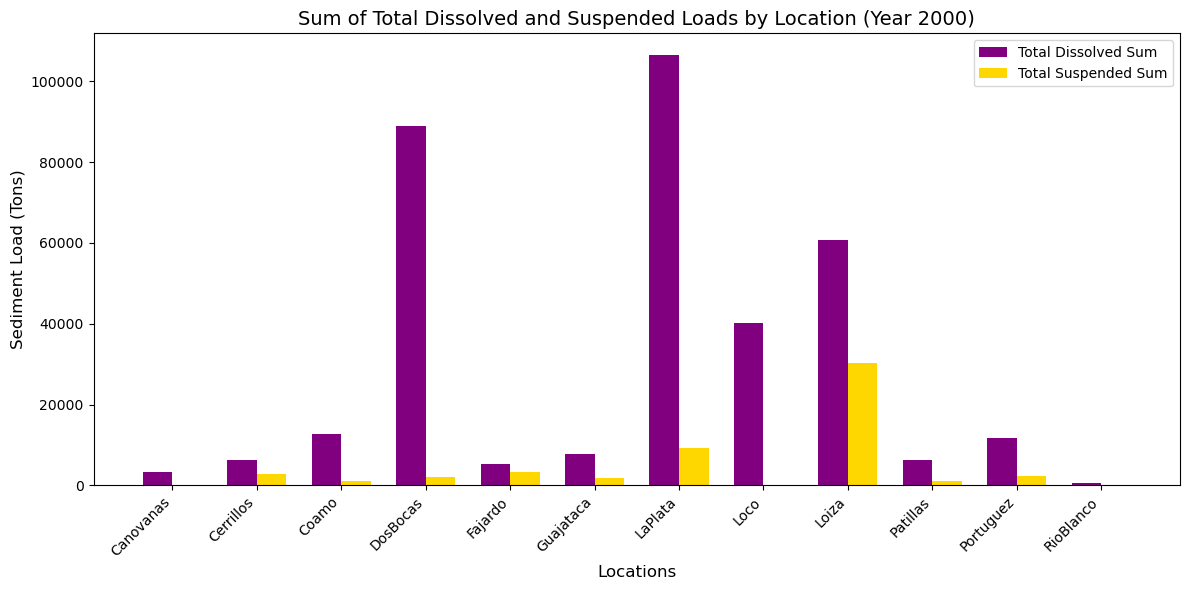

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'wqp_dams_consolidated' is your DataFrame
sum_data = pd.DataFrame(wqp_dams_consolidated)

# Filter data: Keep only necessary columns and drop rows with missing values
filtered_data = sum_data[['Drainage', 'tot_diss_load_sum', 'tot_sus_load_sum']].dropna(subset=['tot_diss_load_sum', 'tot_sus_load_sum'])

# Define the data for plotting
locations = filtered_data['Drainage']  # Locations (Drainage)
tot_diss = filtered_data['tot_diss_load_sum']  # Total dissolved sediment load
tot_sus = filtered_data['tot_sus_load_sum']  # Total suspended sediment load

# X-axis locations for groups
x = np.arange(len(locations))

# Width of bars
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each variable
ax.bar(x - bar_width / 2, tot_diss, bar_width, label='Total Dissolved Sum', color='purple')
ax.bar(x + bar_width / 2, tot_sus, bar_width, label='Total Suspended Sum', color='gold')

# Add labels, title, and legend
ax.set_xlabel('Locations', fontsize=12)
ax.set_ylabel('Sediment Load (Tons)', fontsize=12)
ax.set_title('Sum of Total Dissolved and Suspended Loads by Location (Year 2000)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=45, ha='right', fontsize=10)
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



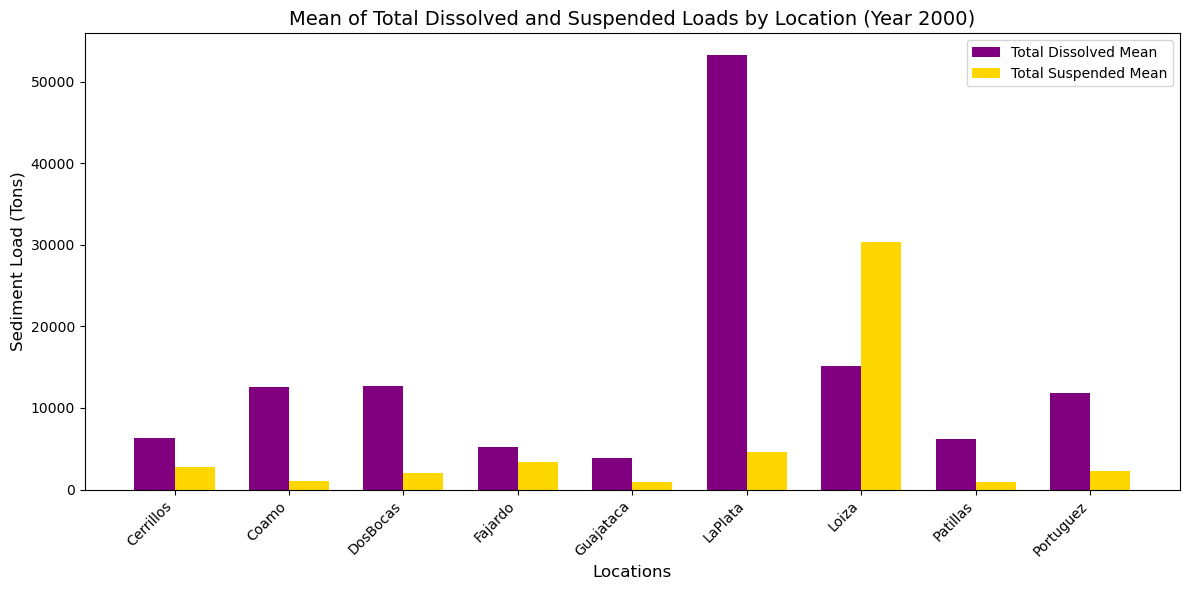

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'wqp_dams_consolidated' is your DataFrame
mean_data = pd.DataFrame(wqp_dams_consolidated)

# Filter data: Keep only necessary columns and drop rows with missing values
filtered_data = sum_data[['Drainage', 'tot_diss_load_mean', 'tot_sus_load_mean']].dropna(subset=['tot_diss_load_mean', 'tot_sus_load_mean'])

# Define the data for plotting
locations = filtered_data['Drainage']  # Locations (Drainage)
tot_diss = filtered_data['tot_diss_load_mean']  # Total dissolved sediment load
tot_sus = filtered_data['tot_sus_load_mean']  # Total suspended sediment load

# X-axis locations for groups
x = np.arange(len(locations))

# Width of bars
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each variable
ax.bar(x - bar_width / 2, tot_diss, bar_width, label='Total Dissolved Mean', color='purple')
ax.bar(x + bar_width / 2, tot_sus, bar_width, label='Total Suspended Mean', color='gold')

# Add labels, title, and legend
ax.set_xlabel('Locations', fontsize=12)
ax.set_ylabel('Sediment Load (Tons)', fontsize=12)
ax.set_title('Mean of Total Dissolved and Suspended Loads by Location (Year 2000)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=45, ha='right', fontsize=10)
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [13]:
wqp_dams_consolidated

wqp_invest_dams_left_join= pd.merge(wqp_dams_consolidated, invest_dams_file, on='Drainage',  how='left')
print(wqp_invest_dams_left_join)

     Drainage  tot_diss_load_sum  tot_diss_load_mean  tot_sus_load_sum  \
0   Canovanas        3235.125918         3235.125918          0.000000   
1   Cerrillos        6336.050072         6336.050072       2776.624700   
2       Coamo       12604.507790        12604.507790        986.472245   
3    DosBocas       89018.092834        12716.870405       2023.669041   
4     Fajardo        5174.149644         5174.149644       3433.621680   
5   Guajataca        7711.135057         3855.567528       1943.060528   
6     LaPlata      106548.761270        53274.380635       9201.159705   
7        Loco       40146.203663        20073.101832          0.000000   
8       Loiza       60826.169028        15206.542257      30343.503650   
9    Patillas        6235.443878         6235.443878        983.946059   
10  Portuguez       11844.328640        11844.328640       2212.319178   
11  RioBlanco         577.384379          288.692189          0.000000   

    tot_sus_load_mean  AreaSqKM  inve

In [14]:
wqp_invest_dam_deposition_left_join= pd.merge(wqp_invest_dams_left_join, dam_deposition_file, on='Drainage',  how='left')
print(wqp_invest_dam_deposition_left_join)

     Drainage  tot_diss_load_sum  tot_diss_load_mean  tot_sus_load_sum  \
0   Canovanas        3235.125918         3235.125918          0.000000   
1   Cerrillos        6336.050072         6336.050072       2776.624700   
2       Coamo       12604.507790        12604.507790        986.472245   
3    DosBocas       89018.092834        12716.870405       2023.669041   
4     Fajardo        5174.149644         5174.149644       3433.621680   
5   Guajataca        7711.135057         3855.567528       1943.060528   
6     LaPlata      106548.761270        53274.380635       9201.159705   
7        Loco       40146.203663        20073.101832          0.000000   
8       Loiza       60826.169028        15206.542257      30343.503650   
9    Patillas        6235.443878         6235.443878        983.946059   
10  Portuguez       11844.328640        11844.328640       2212.319178   
11  RioBlanco         577.384379          288.692189          0.000000   

    tot_sus_load_mean  AreaSqKM  inve

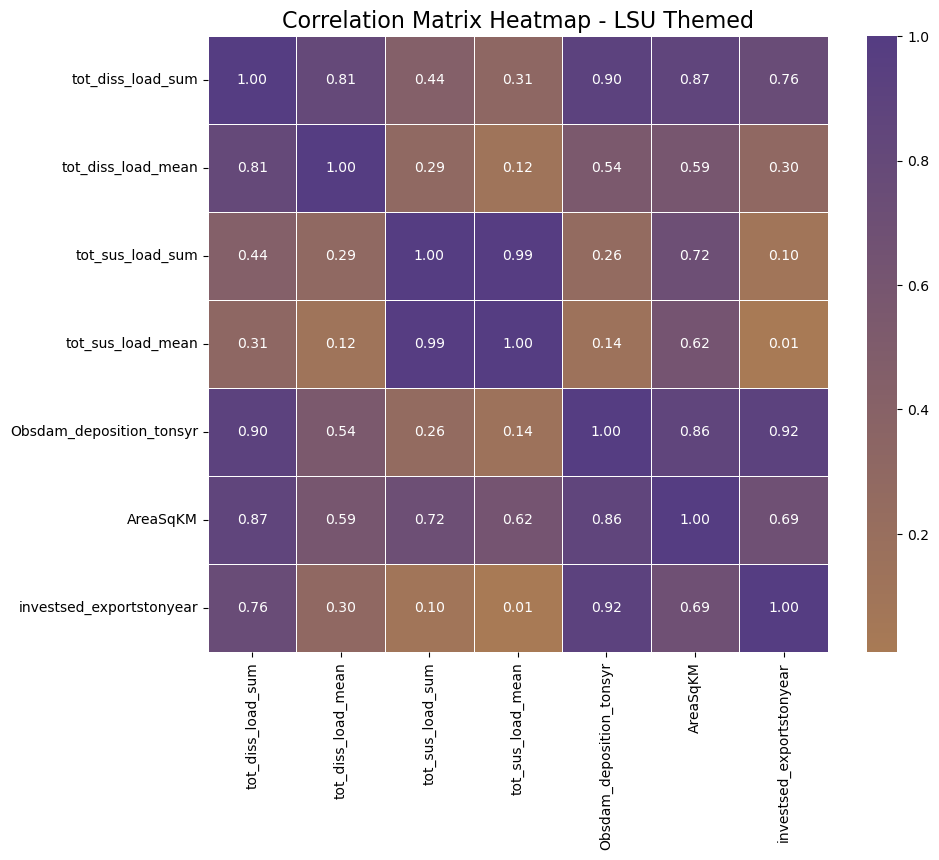

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Assuming your DataFrame is named 'wqp_invest_dep_data'
# If loading from a CSV file, replace this with the actual file path
# wqp_invest_dep_data = pd.read_csv('your_file.csv')

# Example: Replace this line with your actual data-loading step

data = pd.DataFrame(wqp_invest_dam_deposition_left_join)

# List of relevant columns to convert to numeric
columns_to_convert = [
    'tot_diss_load_sum', 
    'tot_diss_load_mean', 
    'tot_sus_load_sum', 
    'tot_sus_load_mean', 
    'Obsdam_deposition_tonsyr',
    'AreaSqKM',  
    'investsed_exportstonyear'  
]

# Ensure columns are numeric, coercing errors to NaN
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Step 2: Compute the correlation matrix for the relevant columns
correlation_matrix = data[columns_to_convert].corr()

# Step 3: Create LSU-themed color palette (LSU Purple and Gold)
lsu_purple = '#553D82'  # LSU Purple
lsu_gold = '#FDB927'    # LSU Gold

# Create a custom colormap (from Gold to Purple)
cmap = mcolors.LinearSegmentedColormap.from_list("LSU_Gold_Purple", [lsu_gold, lsu_purple])

# Step 4: Plot the heatmap with LSU-themed colors
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, center=0)

# Step 5: Display the heatmap with a title
plt.title('Correlation Matrix Heatmap - LSU Themed', fontsize=16)
plt.show()





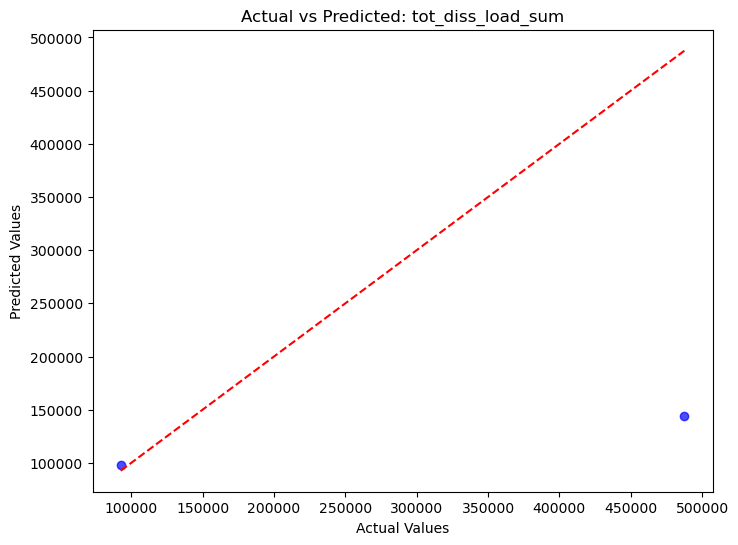

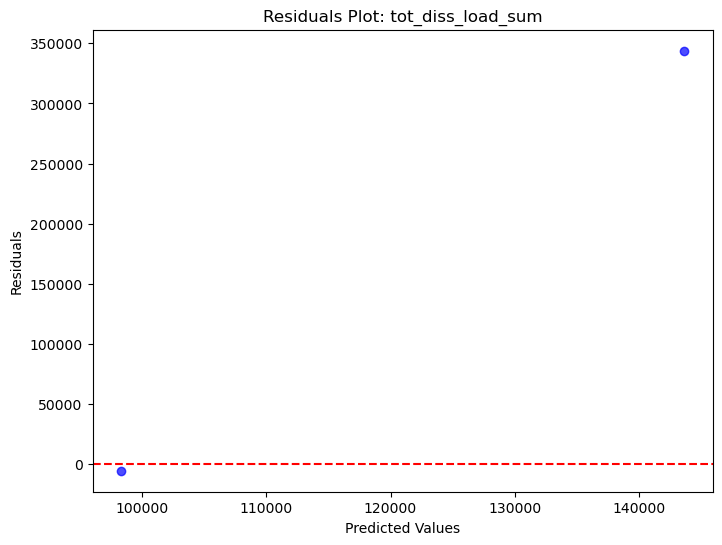

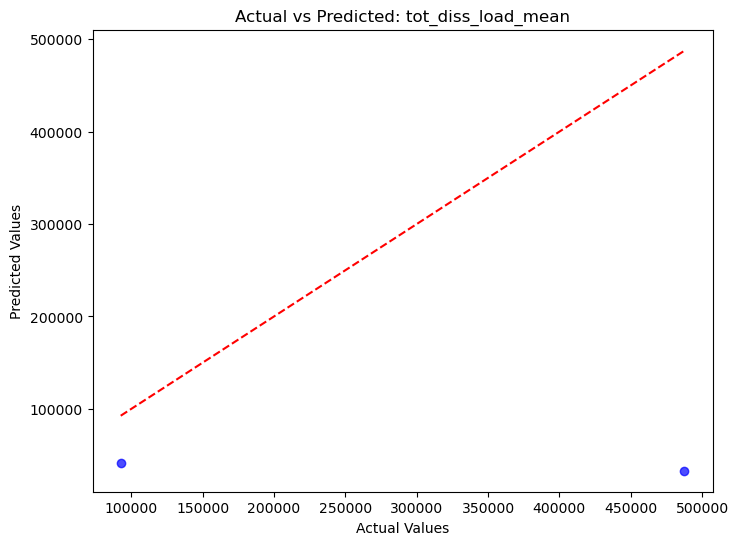

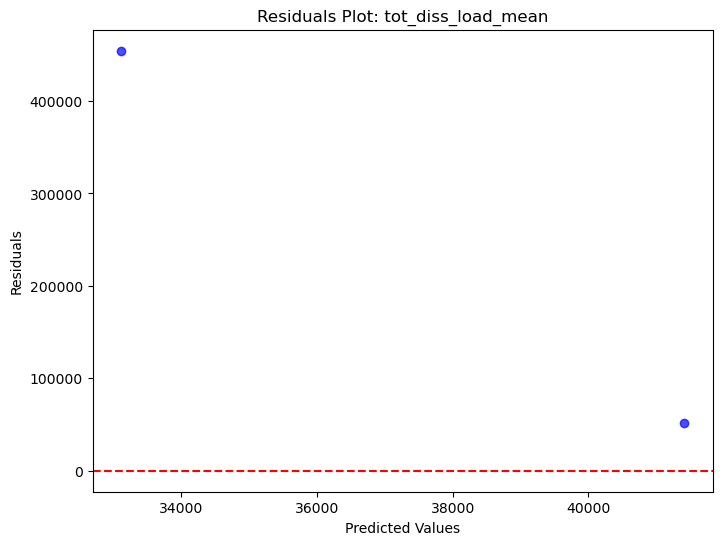

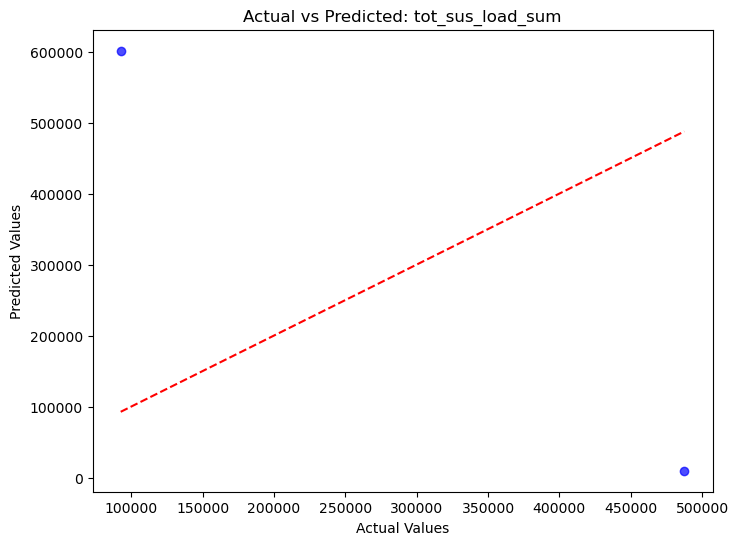

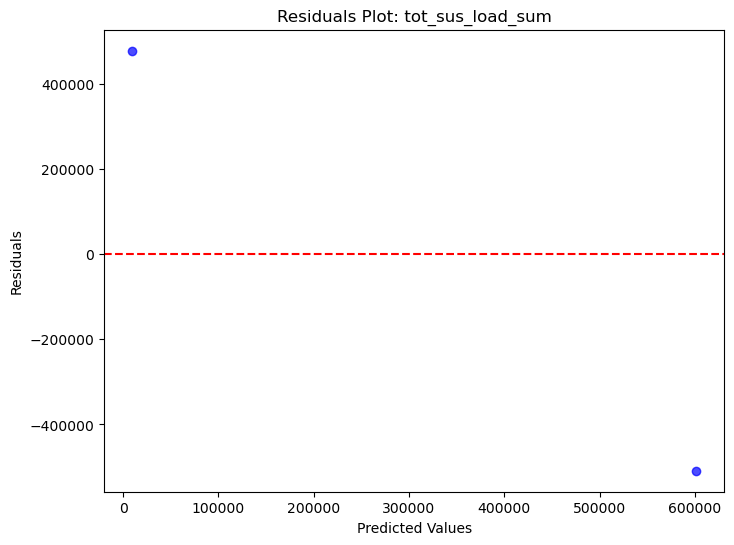

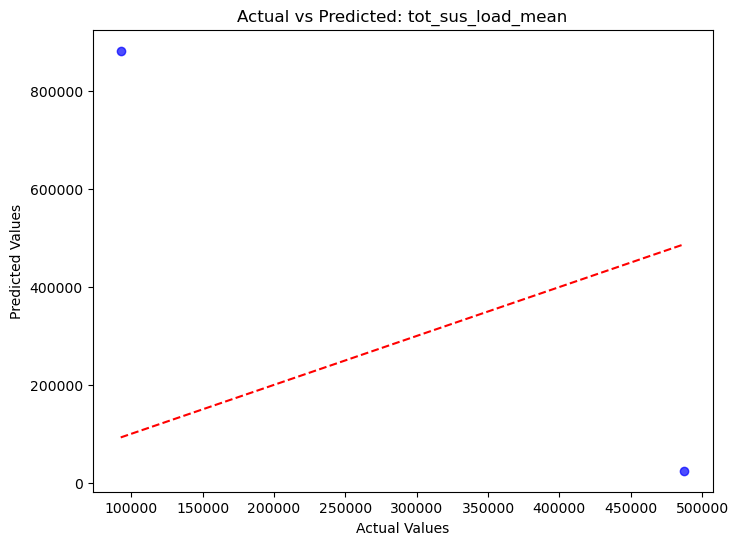

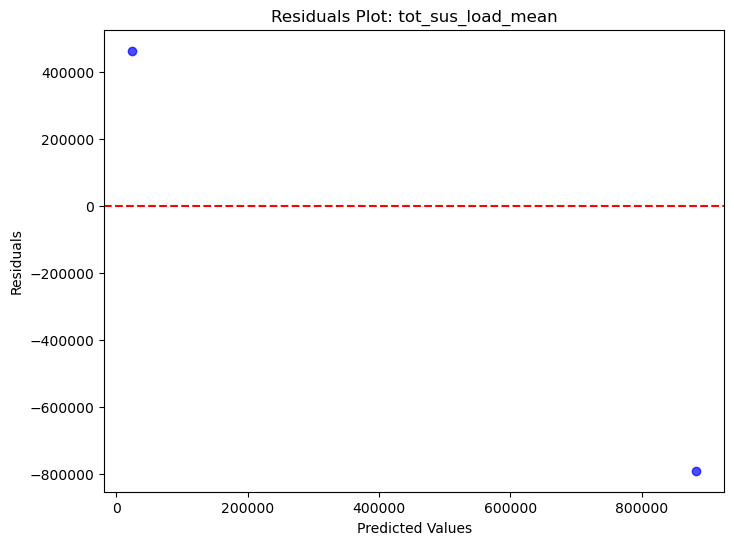

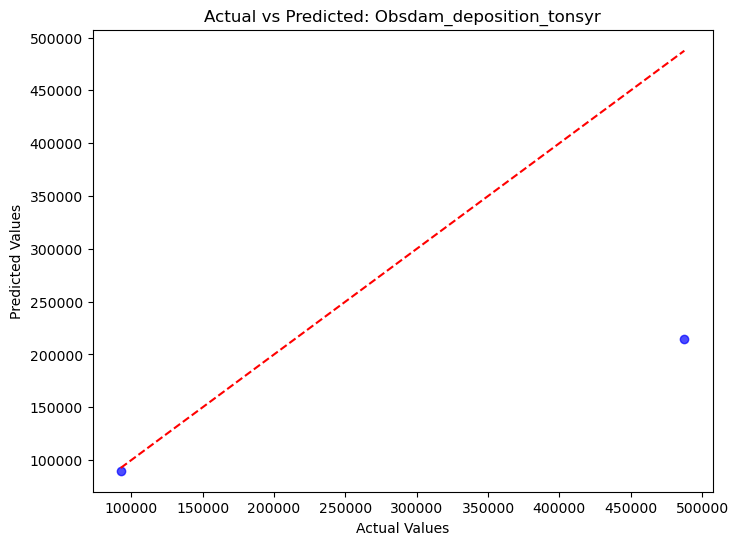

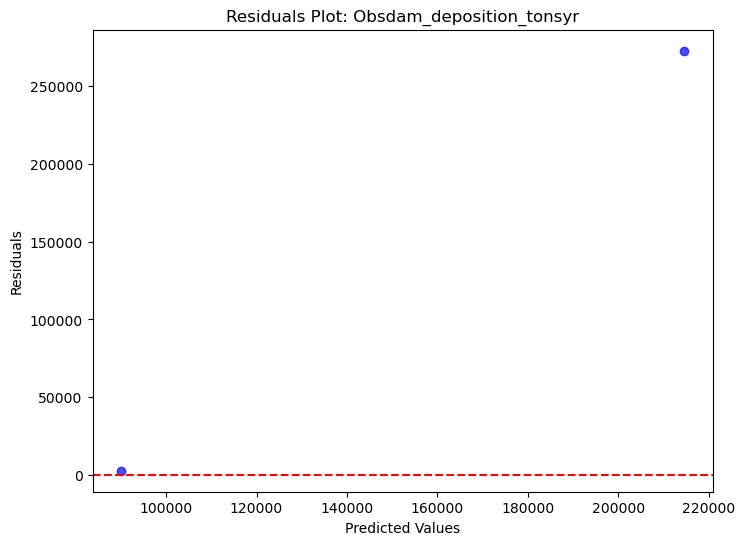

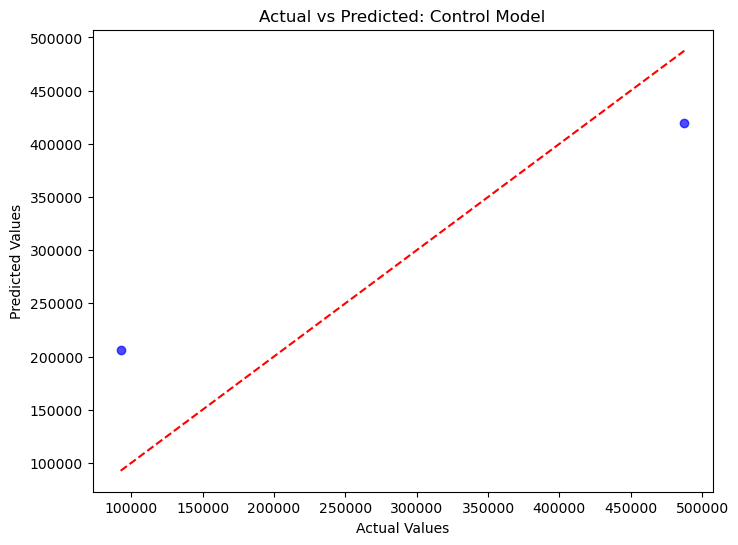

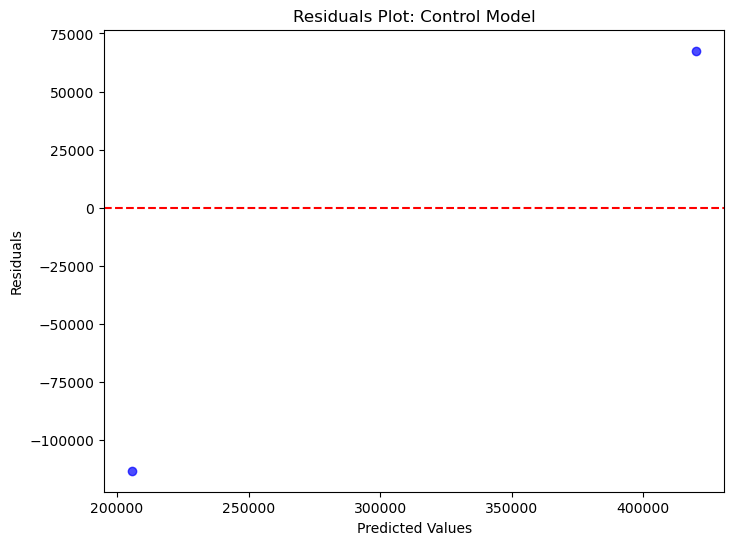

Metrics for each model:

tot_diss_load_sum:
  MSE: 59132891668.85216
  RMSE: 243172.55533643626
  R2: -0.5166762636160767

tot_diss_load_mean:
  MSE: 104556865813.70667
  RMSE: 323352.54106579506
  R2: -1.681737897510439

tot_sus_load_sum:
  MSE: 243516445724.35876
  RMSE: 493473.85515785817
  R2: -5.24585746793155

tot_sus_load_mean:
  MSE: 419391740944.6874
  RMSE: 647604.6177604722
  R2: -9.75681369024748

Obsdam_deposition_tonsyr:
  MSE: 37254645794.13519
  RMSE: 193014.62585549106
  R2: 0.04447025351286782

Control Model:
  MSE: 8690673936.257473
  RMSE: 93223.78417687984
  R2: 0.7770963248717367


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

# Load your data
regression_data = pd.DataFrame(wqp_invest_dam_deposition_left_join)

# Ensure all relevant columns are numeric
columns_to_convert = [
    'tot_diss_load_sum', 
    'tot_diss_load_mean', 
    'tot_sus_load_sum', 
    'tot_sus_load_mean', 
    'Obsdam_deposition_tonsyr',
    'AreaSqKM', 
    'investsed_exportstonyear'
]

# Convert columns to numeric, coercing errors
regression_data[columns_to_convert] = regression_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in relevant columns
regression_data = regression_data.dropna(subset=columns_to_convert)

# Define features (independent variables) and target (dependent variable)
X_explanatory = [
    'tot_diss_load_sum', 'tot_diss_load_mean', 'tot_sus_load_sum', 
    'tot_sus_load_mean', 'Obsdam_deposition_tonsyr'
]

y = regression_data['investsed_exportstonyear']  # Target variable

# Split data into training and testing sets
X = regression_data[X_explanatory]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train regression models for each explanatory variable
models = {}
metrics_dict = {}

for feature in X_explanatory:
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_feature, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_feature)
    
    # Evaluate the model
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    models[feature] = model
    metrics_dict[feature] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    # Plot Actual vs Predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted: {feature}')
    plt.show()

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot: {feature}')
    plt.show()

# Add control variable ('AreaSqKM')
X_control = X_train.copy()
X_control['AreaSqKM'] = regression_data['AreaSqKM'].loc[X_train.index]

X_test_control = X_test.copy()
X_test_control['AreaSqKM'] = regression_data['AreaSqKM'].loc[X_test.index]

# Train the model with control variable
model_control = LinearRegression()
model_control.fit(X_control, y_train)

# Make predictions
y_pred_control = model_control.predict(X_test_control)

# Evaluate the control model
mse_control = metrics.mean_squared_error(y_test, y_pred_control)
rmse_control = np.sqrt(mse_control)
r2_control = metrics.r2_score(y_test, y_pred_control)

metrics_dict['Control Model'] = {'MSE': mse_control, 'RMSE': rmse_control, 'R2': r2_control}

# Plot Actual vs Predicted for control model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_control, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Control Model')
plt.show()

# Plot Residuals for control model
residuals_control = y_test - y_pred_control
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_control, residuals_control, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot: Control Model')
plt.show()

# Compare the models' metrics
print("Metrics for each model:")
for model_name, metrics_vals in metrics_dict.items():
    print(f"\n{model_name}:")
    print(f"  MSE: {metrics_vals['MSE']}")
    print(f"  RMSE: {metrics_vals['RMSE']}")
    print(f"  R2: {metrics_vals['R2']}")



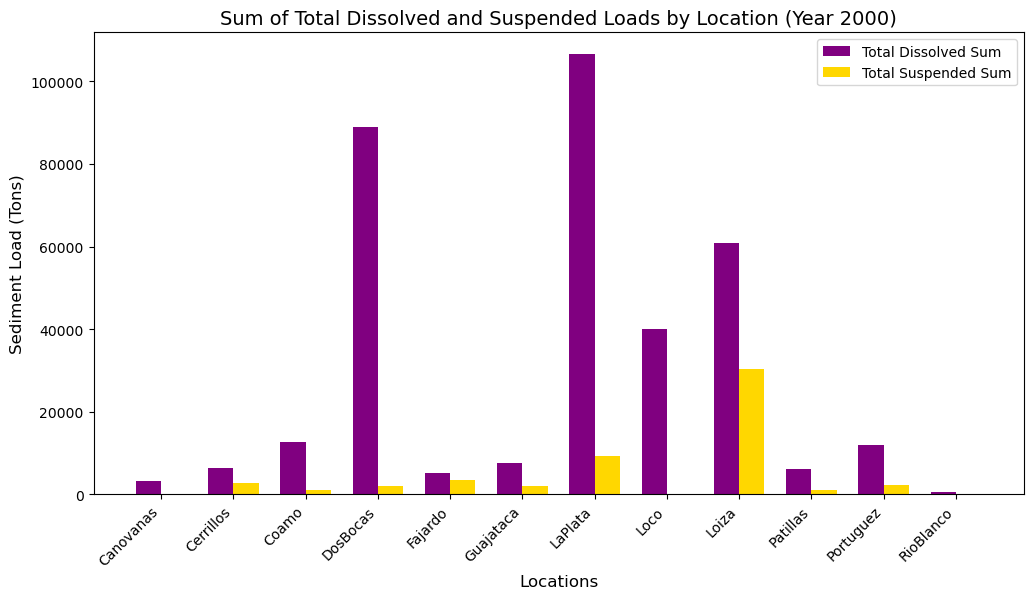

In [28]:
import matplotlib.pyplot as plt

# Assuming 'wqp_dams_consolidated' is your DataFrame
sum_data = pd.DataFrame(wqp_dams_consolidated)

# Filter data: Keep only necessary columns and drop rows with missing values
filtered_data = sum_data[['Drainage', 'tot_diss_load_sum', 'tot_sus_load_sum']].dropna(subset=['tot_diss_load_sum', 'tot_sus_load_sum'])

# Define the data for plotting
locations = filtered_data['Drainage']  # Locations (Drainage)
tot_diss = filtered_data['tot_diss_load_sum']  # Total dissolved sediment load
tot_sus = filtered_data['tot_sus_load_sum']  # Total suspended sediment load

# X-axis locations for groups
x = np.arange(len(locations))

# Width of bars
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each variable
ax.bar(x - bar_width / 2, tot_diss, bar_width, label='Total Dissolved Sum', color='purple')
ax.bar(x + bar_width / 2, tot_sus, bar_width, label='Total Suspended Sum', color='gold')

# Add labels, title, and legend
ax.set_xlabel('Locations', fontsize=12)
ax.set_ylabel('Sediment Load (Tons)', fontsize=12)
ax.set_title('Sum of Total Dissolved and Suspended Loads by Location (Year 2000)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=45, ha='right', fontsize=10)
ax.legend()


# Save the plot as a PNG file
plt.savefig('graph.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


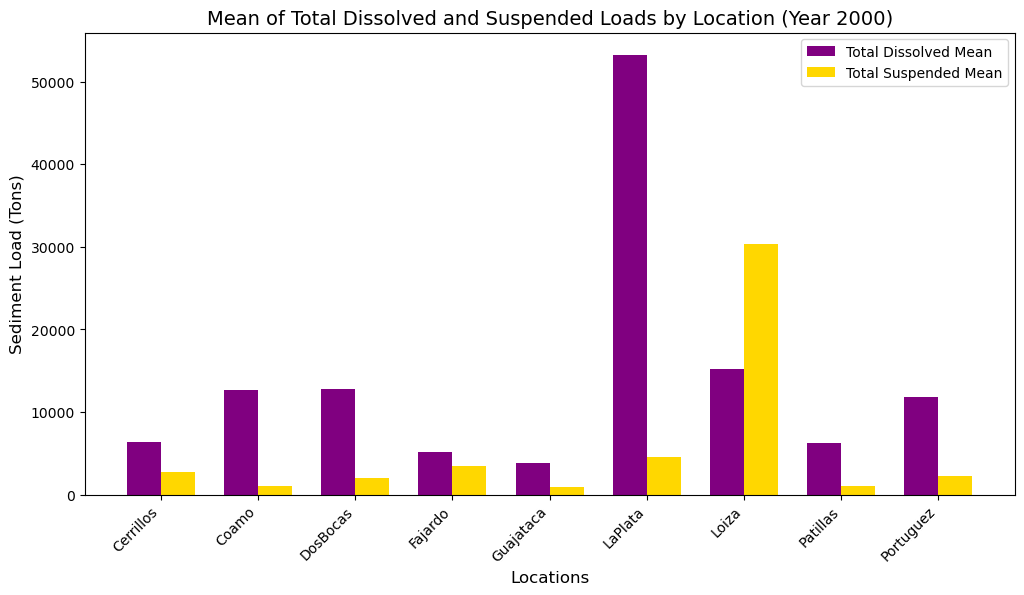

In [25]:
# Assuming 'wqp_dams_consolidated' is your DataFrame
mean_data = pd.DataFrame(wqp_dams_consolidated)

# Filter data: Keep only necessary columns and drop rows with missing values
filtered_data = sum_data[['Drainage', 'tot_diss_load_mean', 'tot_sus_load_mean']].dropna(subset=['tot_diss_load_mean', 'tot_sus_load_mean'])

# Define the data for plotting
locations = filtered_data['Drainage']  # Locations (Drainage)
tot_diss = filtered_data['tot_diss_load_mean']  # Total dissolved sediment load
tot_sus = filtered_data['tot_sus_load_mean']  # Total suspended sediment load

# X-axis locations for groups
x = np.arange(len(locations))

# Width of bars
bar_width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each variable
ax.bar(x - bar_width / 2, tot_diss, bar_width, label='Total Dissolved Mean', color='purple')
ax.bar(x + bar_width / 2, tot_sus, bar_width, label='Total Suspended Mean', color='gold')

# Add labels, title, and legend
ax.set_xlabel('Locations', fontsize=12)
ax.set_ylabel('Sediment Load (Tons)', fontsize=12)
ax.set_title('Mean of Total Dissolved and Suspended Loads by Location (Year 2000)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=45, ha='right', fontsize=10)
ax.legend()



# Save the plot as a PNG file
plt.savefig('graph.png', format='png', dpi=300)

# Show the plot (optional)
plt.show()


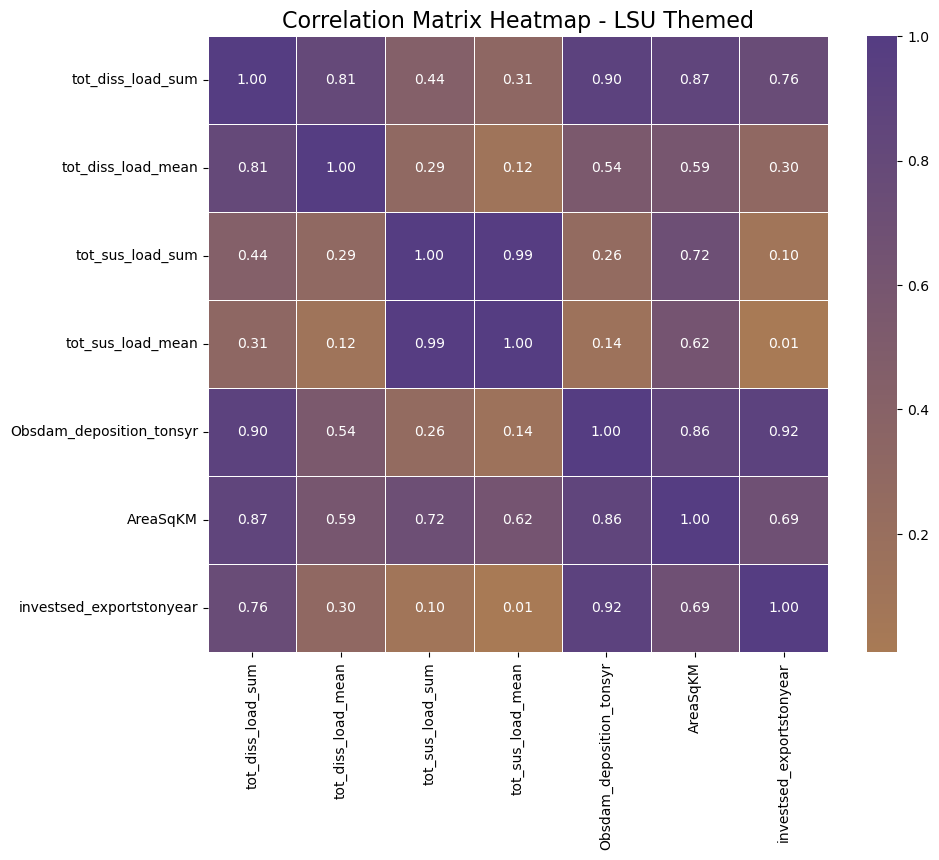

In [26]:
# Assuming your DataFrame is named 'wqp_invest_dep_data'
# If loading from a CSV file, replace this with the actual file path
# wqp_invest_dep_data = pd.read_csv('your_file.csv')

# Example: Replace this line with your actual data-loading step

data = pd.DataFrame(wqp_invest_dam_deposition_left_join)

# List of relevant columns to convert to numeric
columns_to_convert = [
    'tot_diss_load_sum', 
    'tot_diss_load_mean', 
    'tot_sus_load_sum', 
    'tot_sus_load_mean', 
    'Obsdam_deposition_tonsyr',
    'AreaSqKM',  
    'investsed_exportstonyear'  
]

# Ensure columns are numeric, coercing errors to NaN
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Step 2: Compute the correlation matrix for the relevant columns
correlation_matrix = data[columns_to_convert].corr()

# Step 3: Create LSU-themed color palette (LSU Purple and Gold)
lsu_purple = '#553D82'  # LSU Purple
lsu_gold = '#FDB927'    # LSU Gold

# Create a custom colormap (from Gold to Purple)
cmap = mcolors.LinearSegmentedColormap.from_list("LSU_Gold_Purple", [lsu_gold, lsu_purple])

# Step 4: Plot the heatmap with LSU-themed colors
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, center=0)

# Step 5: Display the heatmap with a title
plt.title('Correlation Matrix Heatmap - LSU Themed', fontsize=16)


# Save the plot as a PNG file
plt.savefig('graph.png', format='png', dpi=300)
plt.show()

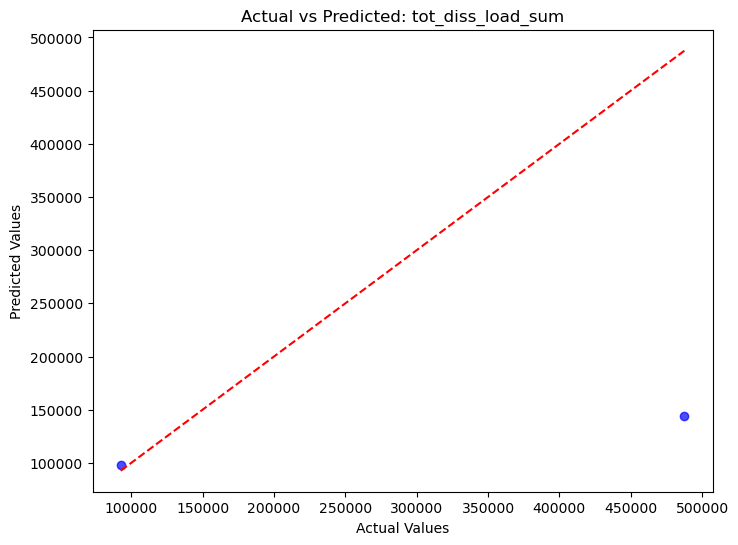

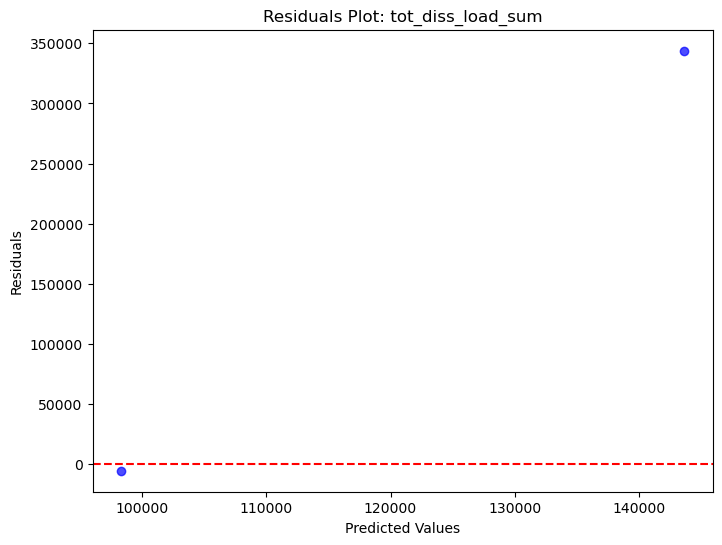

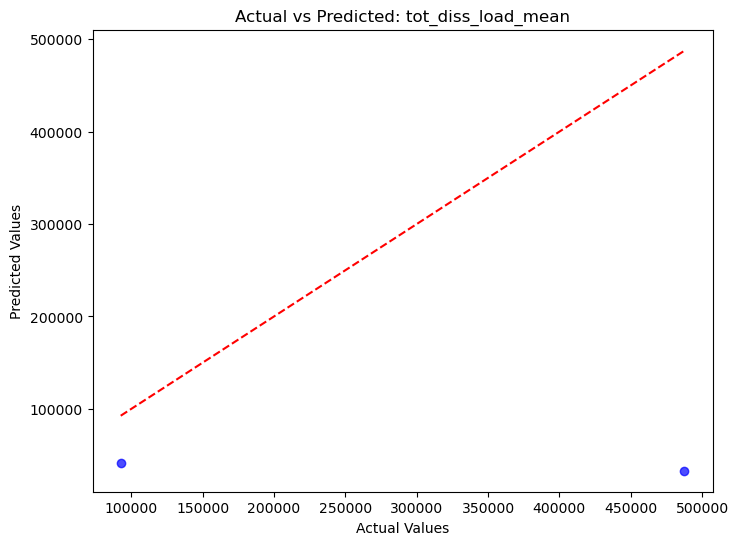

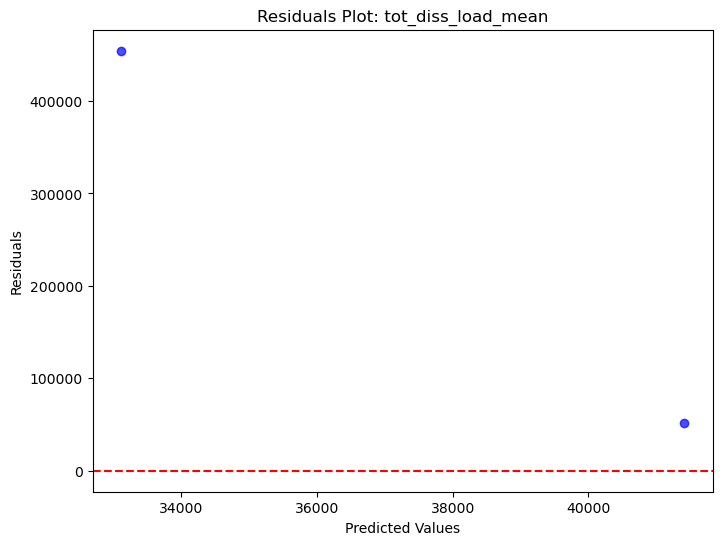

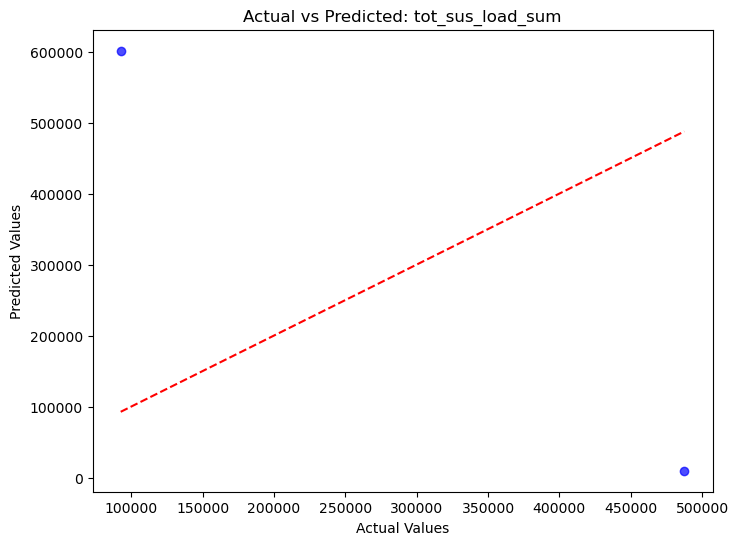

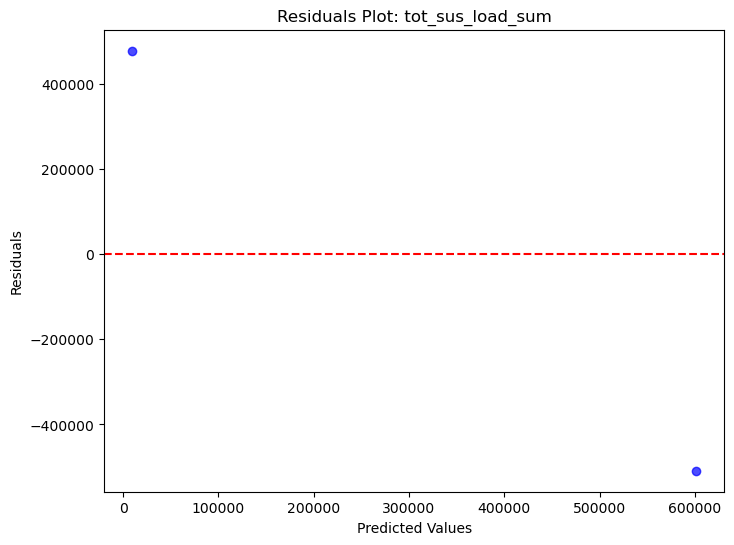

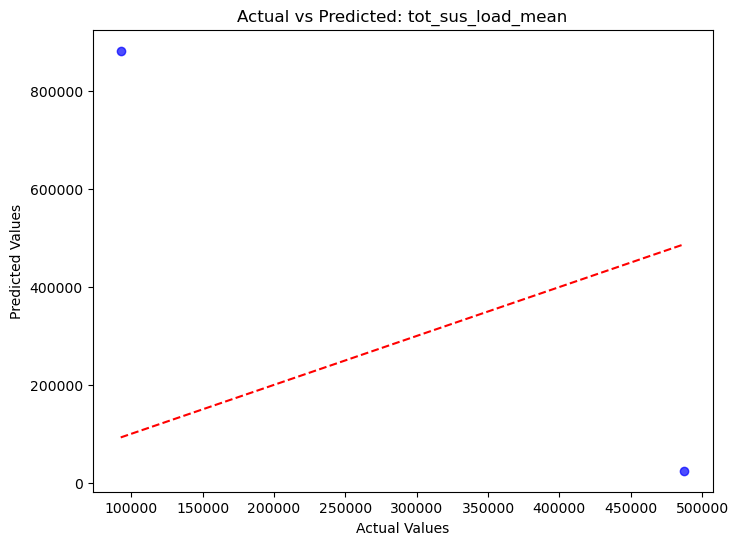

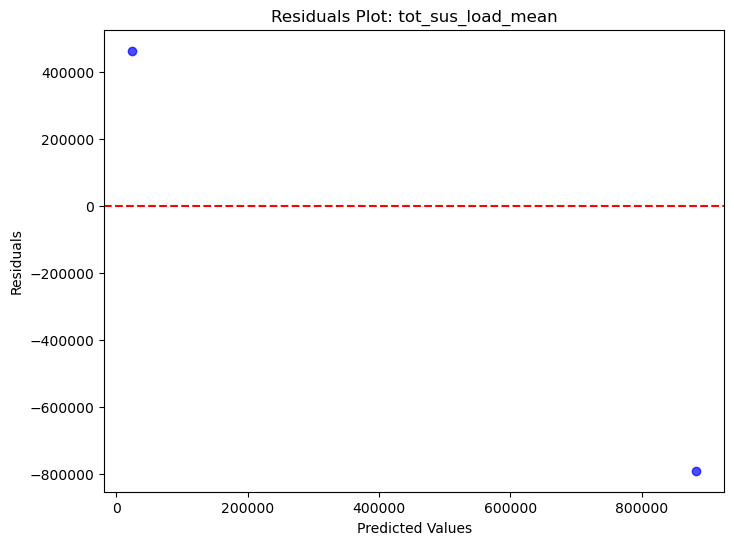

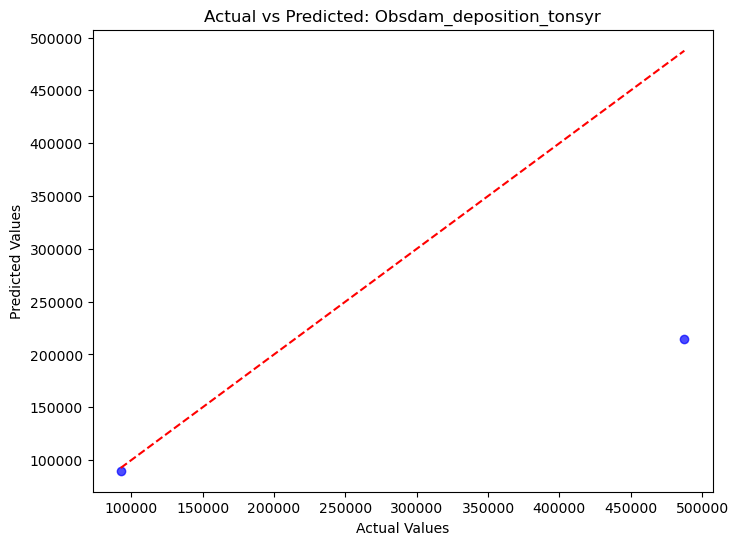

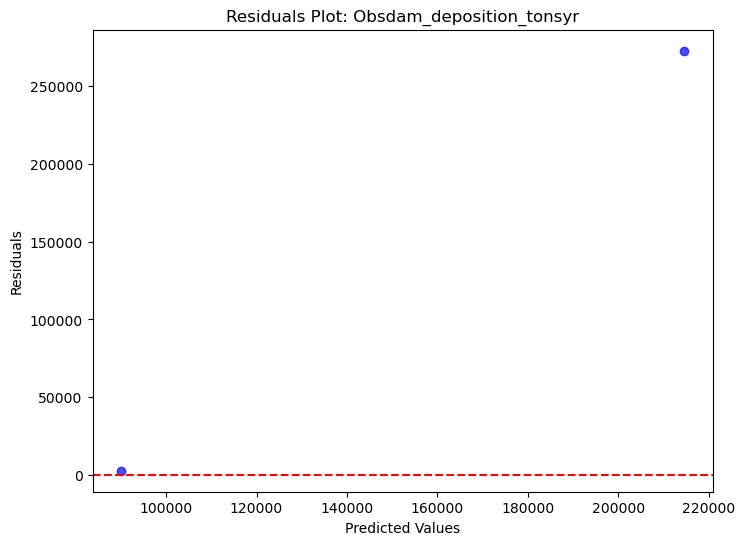

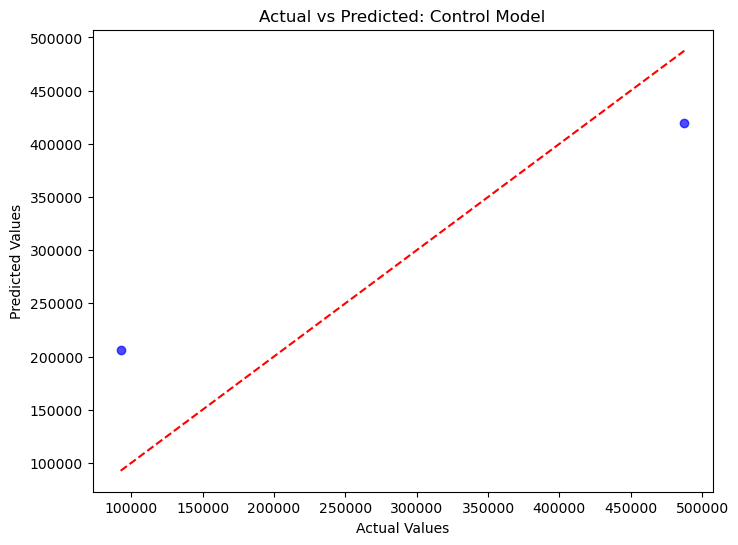

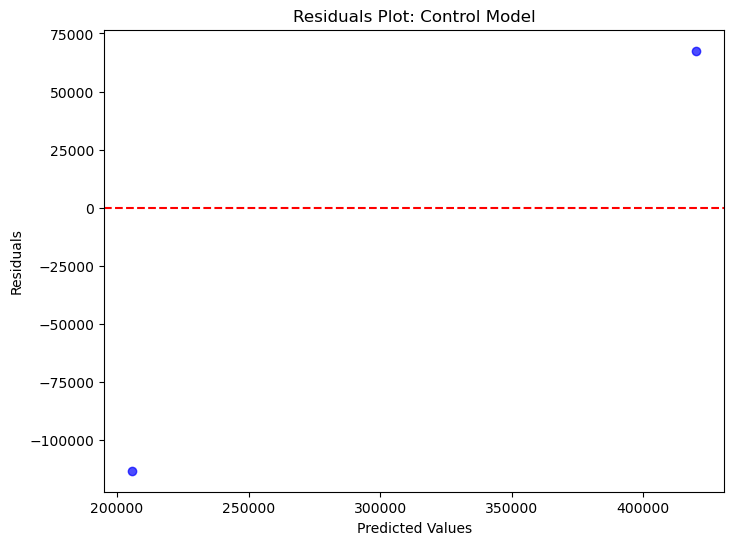

Metrics for each model:

tot_diss_load_sum:
  MSE: 59132891668.85216
  RMSE: 243172.55533643626
  R2: -0.5166762636160767

tot_diss_load_mean:
  MSE: 104556865813.70667
  RMSE: 323352.54106579506
  R2: -1.681737897510439

tot_sus_load_sum:
  MSE: 243516445724.35876
  RMSE: 493473.85515785817
  R2: -5.24585746793155

tot_sus_load_mean:
  MSE: 419391740944.6874
  RMSE: 647604.6177604722
  R2: -9.75681369024748

Obsdam_deposition_tonsyr:
  MSE: 37254645794.13519
  RMSE: 193014.62585549106
  R2: 0.04447025351286782

Control Model:
  MSE: 8690673936.257473
  RMSE: 93223.78417687984
  R2: 0.7770963248717367


<Figure size 640x480 with 0 Axes>

In [20]:
# Load your data
regression_data = pd.DataFrame(wqp_invest_dam_deposition_left_join)

# Ensure all relevant columns are numeric
columns_to_convert = [
    'tot_diss_load_sum', 
    'tot_diss_load_mean', 
    'tot_sus_load_sum', 
    'tot_sus_load_mean', 
    'Obsdam_deposition_tonsyr',
    'AreaSqKM', 
    'investsed_exportstonyear'
]

# Convert columns to numeric, coercing errors
regression_data[columns_to_convert] = regression_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in relevant columns
regression_data = regression_data.dropna(subset=columns_to_convert)

# Define features (independent variables) and target (dependent variable)
X_explanatory = [
    'tot_diss_load_sum', 'tot_diss_load_mean', 'tot_sus_load_sum', 
    'tot_sus_load_mean', 'Obsdam_deposition_tonsyr'
]

y = regression_data['investsed_exportstonyear']  # Target variable

# Split data into training and testing sets
X = regression_data[X_explanatory]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train regression models for each explanatory variable
models = {}
metrics_dict = {}

for feature in X_explanatory:
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_feature, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_feature)
    
    # Evaluate the model
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    models[feature] = model
    metrics_dict[feature] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    
    # Plot Actual vs Predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted: {feature}')
    plt.show()

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot: {feature}')
    plt.show()

# Add control variable ('AreaSqKM')
X_control = X_train.copy()
X_control['AreaSqKM'] = regression_data['AreaSqKM'].loc[X_train.index]

X_test_control = X_test.copy()
X_test_control['AreaSqKM'] = regression_data['AreaSqKM'].loc[X_test.index]

# Train the model with control variable
model_control = LinearRegression()
model_control.fit(X_control, y_train)

# Make predictions
y_pred_control = model_control.predict(X_test_control)

# Evaluate the control model
mse_control = metrics.mean_squared_error(y_test, y_pred_control)
rmse_control = np.sqrt(mse_control)
r2_control = metrics.r2_score(y_test, y_pred_control)

metrics_dict['Control Model'] = {'MSE': mse_control, 'RMSE': rmse_control, 'R2': r2_control}

# Plot Actual vs Predicted for control model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_control, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted: Control Model')
plt.show()

# Plot Residuals for control model
residuals_control = y_test - y_pred_control
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_control, residuals_control, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot: Control Model')
plt.show()

# Compare the models' metrics
print("Metrics for each model:")
for model_name, metrics_vals in metrics_dict.items():
    print(f"\n{model_name}:")
    print(f"  MSE: {metrics_vals['MSE']}")
    print(f"  RMSE: {metrics_vals['RMSE']}")
    print(f"  R2: {metrics_vals['R2']}")

# Save the plot as a PNG file
plt.savefig('graph.png', format='png', dpi=300)
plt.show()